In [1]:
from visualize import plot_statistics, barplot_execution_times
import subprocess, time, json, random
import json

NUM_TEST = 1
nJobs = [1, 2]
dataset_percentage = [100]
implementations = ["map-reduce", "spark-core", "spark-sql", "hive"]


In [ ]:
implementation_2_times = {}

for nJob in nJobs:
    implementation_2_times[nJob] = {}
    print(f"Running job {nJob}")
    for implem in implementations:
        print(f"\tImplementation {implem}")
        implementation_2_times[nJob][implem] = {}
        elapsed_times = []
        for pct in dataset_percentage:
            print(f"\t\tDataset percentage {pct}")
            times = []
            for i in range(1, NUM_TEST+1):
                print(f"\t\t\tTest number {i}")
                start_time = time.time()
                subprocess.call(['bash', 'shell_scripts/run_job.sh', 
                                 str(nJob), implem, str(pct)], 
                                 stdout=subprocess.DEVNULL)
                times.append(time.time() - start_time)
            elapsed_times.append(times)
            implementation_2_times[nJob][implem][pct] = times

        #plot_statistics(NUM_TEST, elapsed_times, nJob, implem, pct)
with open('data.json', 'w') as fp:
    json.dump(implementation_2_times, fp)


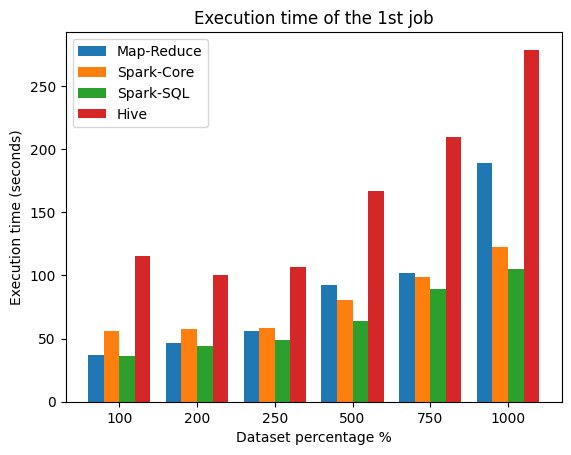

In [2]:
with open('mean_data.json', 'r') as fp:
    data = json.load(fp)
    data_1_job = data['1']
    data_2_job = data['2']

barplot_execution_times(data_1_job, nJob=1)

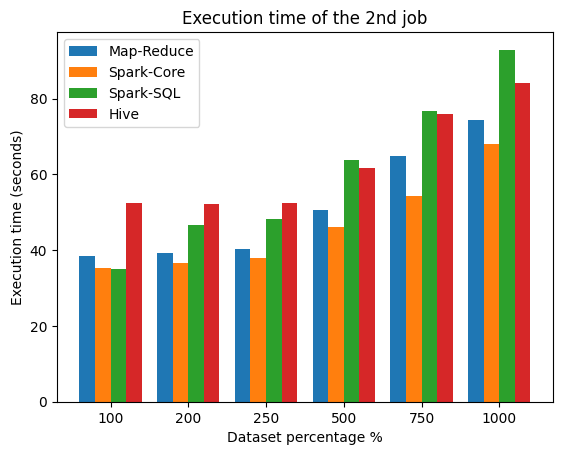

In [3]:
barplot_execution_times(data_2_job, nJob=2)